In [21]:
# Importing the necessary packages
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Project Proposal

Proposal [20 points]: 

- Description of the basic problems to be considered.

Dimensionality reduction for financial data: Principal Component Analysis(PCA)



- Datasets to be studied (if any)


- Half a page. 

The purpose is for the instructors to get a sense of whether the
project is overly ambitious or too small in scope to be eligible for full marks

## Some Briefs on our Data:

Using Yahoo Finance package, we are zooming in on the recent historical daily stock price (2019 - 2024)data from Yahoo Finance for:
- AAPL: Apple Inc

- MSFT: Microsoft Corporation

- GOOGL: Alphabet Inc. (Google)

- AMZN: Amazon.com, Inc.

- META: Meta Platforms, Inc. (formerly Facebook)

Where columns are defined as follows:
- Open:	The price at which the stock opened trading on that day.
- High:	The highest price the stock traded at during the day.
- Low:	The lowest price the stock traded at during the day.
- Close: The last traded price before the market closed.
- Volume: The total number of shares traded that day.


What we can do with the data using the Principal Component Analysis might by the follows:

- Portfolio Diversification: Identify which stocks move together — useful for risk hedging.
- Noise Filtering: Remove small-variance PCs to reduce high-frequency market noise.

### Please let me know if you guys have any other great ideas!

### Sample Code Up 1:  Portfolio Diversificaition

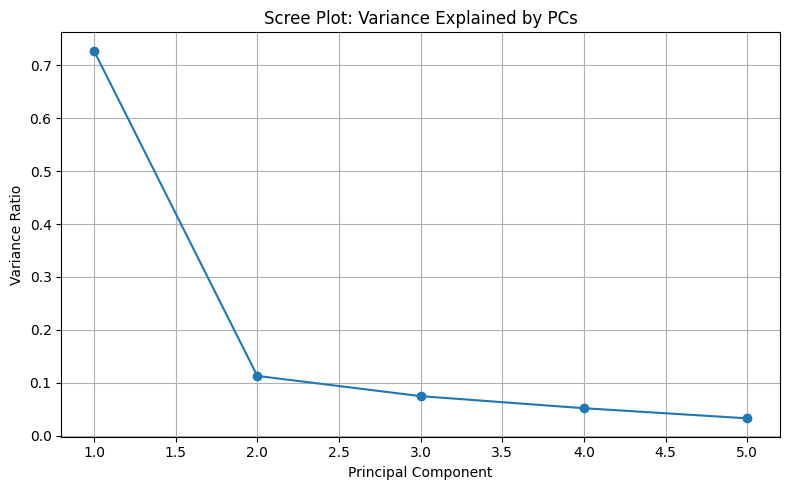

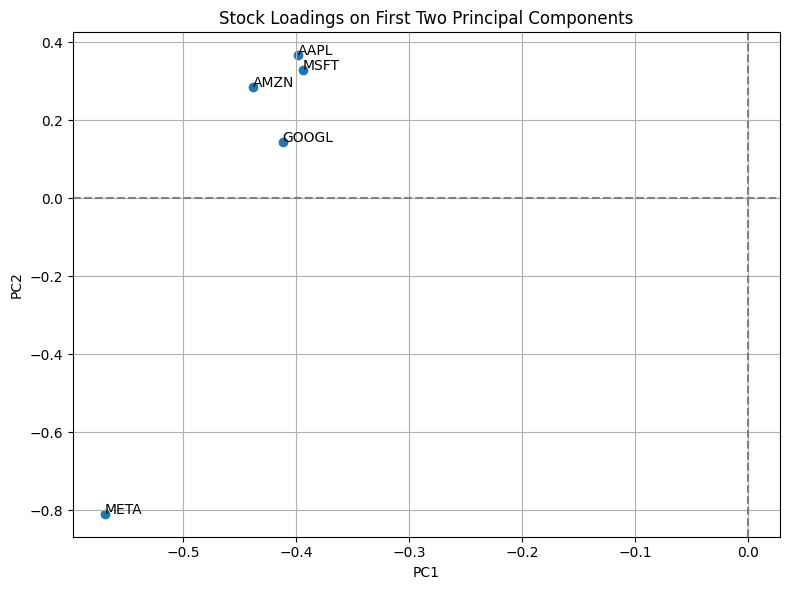

In [19]:
data_closing = data['Close'].dropna()
data_closing

# Compute daily returns
returns = data_closing.pct_change().dropna()
# Fit PCA
pca = PCA()
pca.fit(returns)

# Transform returns
pca_components = pca.transform(returns)
explained = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('Scree Plot: Variance Explained by PCs')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


# Stock loadings on PC1 & PC2
loadings = pd.DataFrame(pca.components_.T, index=returns.columns, columns=[f'PC{i+1}' for i in range(len(returns.columns))])
plt.figure(figsize=(8, 6))
plt.scatter(loadings['PC1'], loadings['PC2'])

for i in loadings.index:
    plt.text(loadings['PC1'][i], loadings['PC2'][i], i)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Stock Loadings on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

### The following are some basic pca rolling windows 

In [21]:
import yfinance as yf
import pandas as pd
import datetime as dt

mixed_stocks = [
    'NEE', 'ED', 'PEG', 'XEL', 'D', 'EXC', 'SRE',  'SO', 'DUK', 'JKS',
    'MSFT', 'SHOP', 'MSTR', 'CRM', 'AMD', 'DIOD', 'INTC', 'MRVL', 'ADI', 'AVGO', 'QCOM', 'NVDA',
    'ATOM', 'AMKR', 'VLO', 'MPC', 'XOM', 'WMB', 'EQT', 'SHEL', 'BP', 'TTE', 'OXY', 'CVX',
    'AMZN', 'IAC', 'GOOGL', 'META', 'IBM', 'NOW', 'DXC',  'WIT', 'TCS.NS', 'CTSH', 'ACN',
    'CVS', 'MRK', 'JNJ', 'UNH', 'NVO', 'LLY', 'KR', 'COST',  'TGT',  'WMT',
    'NFLX', 'DIS', 'TTWO', 'EA', 'ROKU', 'JBL', 'GLW', 'TEL', 'APH', 'CLS', 'ELTK', 'LYTS',
    'PFE', 'ABBV', 'BMY', 'AMGN', 'PYPL', 'ALLY', 'SYF', 'DFS', 'COF', 'AXP', 'MA', 'V',
    'AAPL', 'SONY',  'GPRO', 'LPL',  'IBKR', 'MARA', 'LPLA', 'RJF',  'MS',
    'SCHW', 'GS', 'JPM', 'BAC', 'TSLA',   'GM'
]

# note : we have already defined mixed_stocks before
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2024, 12, 31)
data = yf.download(mixed_stocks, start=start_date, end=end_date)


# drop rows with missing data
cleaned_data = data.dropna()

print(f"Shape of cleaned dataset: {cleaned_data.shape}")
print(cleaned_data.head())


[*********************100%***********************]  94 of 94 completed


Shape of cleaned dataset: (1672, 470)
Price           Close                                                      \
Ticker           AAPL       ABBV         ACN        ADI       ALLY    AMD   
Date                                                                        
2018-01-02  40.426823  71.013664  137.391525  78.786255  23.622896  10.98   
2018-01-03  40.419781  72.124931  138.025620  79.763672  23.510521  11.55   
2018-01-04  40.607529  71.713623  139.659973  79.676376  23.855675  12.12   
2018-01-05  41.069866  72.962006  140.812073  79.999313  24.257017  11.88   
2018-01-08  40.917320  71.792992  141.937317  80.138924  23.943968  12.28   

Price                                                    ...     Volume  \
Ticker            AMGN       AMKR       AMZN        APH  ...        TTE   
Date                                                     ...              
2018-01-02  142.097519   9.713057  59.450500  20.446011  ...  1116400.0   
2018-01-03  144.778915   9.684820  60.209999 

[*********************100%***********************]  10 of 10 completed
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


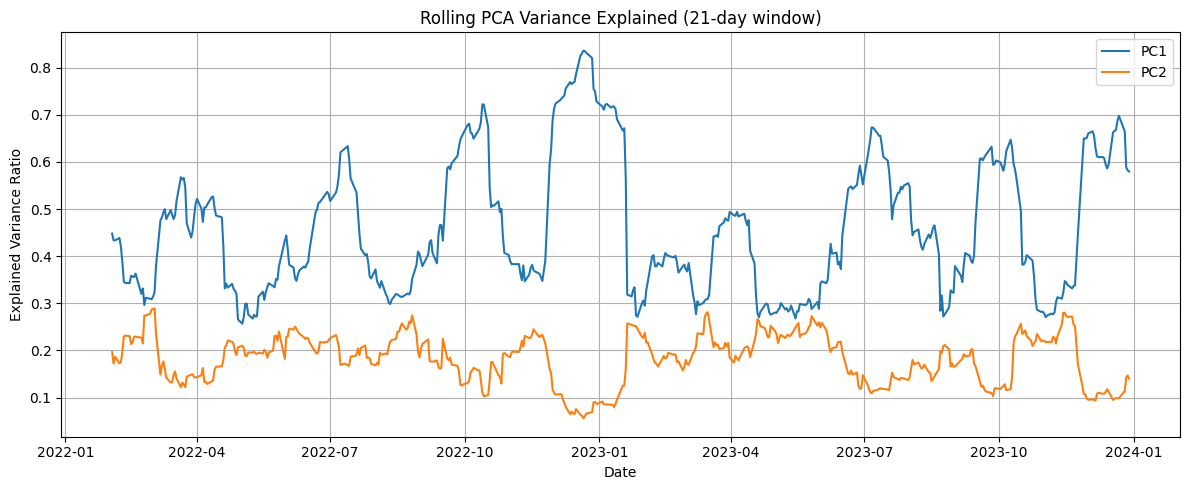

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select 10 example stocks
tickers = ['MSFT', 'AAPL', 'GOOGL', 'AMZN', 'META', 'XOM', 'CVX', 'JPM', 'BAC', 'NVDA']

# Download Adjusted Close prices (2022–2023)
data = yf.download(tickers, start='2022-01-01', end='2023-12-31').dropna()

# Compute log returns
returns = np.log(data / data.shift(1)).dropna()

# Rolling PCA (21-day window, 1-day step)
window_size = 21
pc1_variances, pc2_variances, dates = [], [], []

for start in range(0, len(returns) - window_size + 1):
    window = returns.iloc[start:start+window_size]
    pca = PCA(n_components=2).fit(window)
    pc1_variances.append(pca.explained_variance_ratio_[0])
    pc2_variances.append(pca.explained_variance_ratio_[1])
    dates.append(returns.index[start + window_size - 1])

# Store results
pca_df = pd.DataFrame({
    'Date': dates,
    'PC1_Variance': pc1_variances,
    'PC2_Variance': pc2_variances
}).set_index('Date')

# Plot variance explained
plt.figure(figsize=(12, 5))
plt.plot(pca_df.index, pca_df['PC1_Variance'], label='PC1')
plt.plot(pca_df.index, pca_df['PC2_Variance'], label='PC2')
plt.title('Rolling PCA Variance Explained (21-day window)')
plt.xlabel('Date')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%***********************]  10 of 10 completed
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


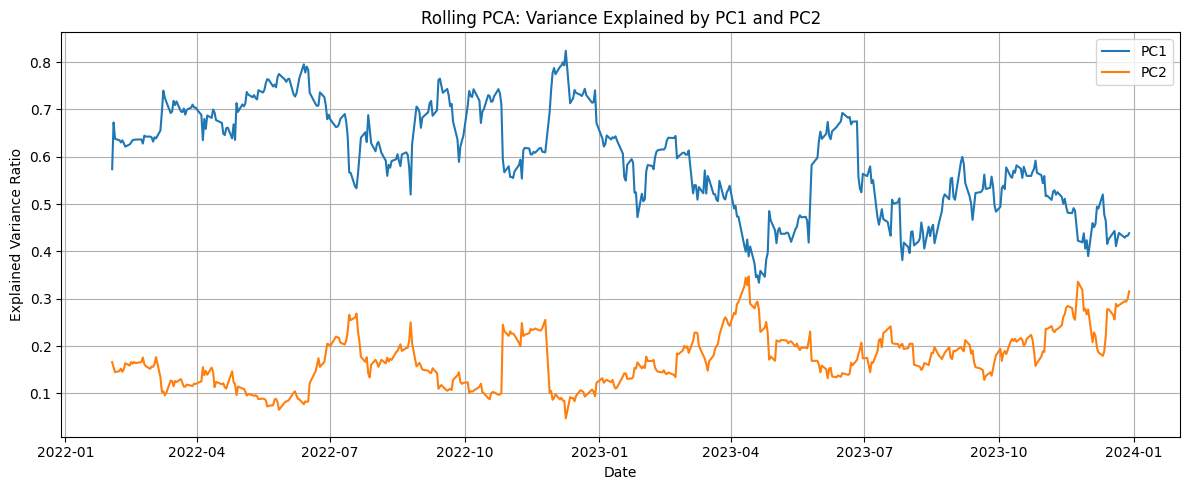

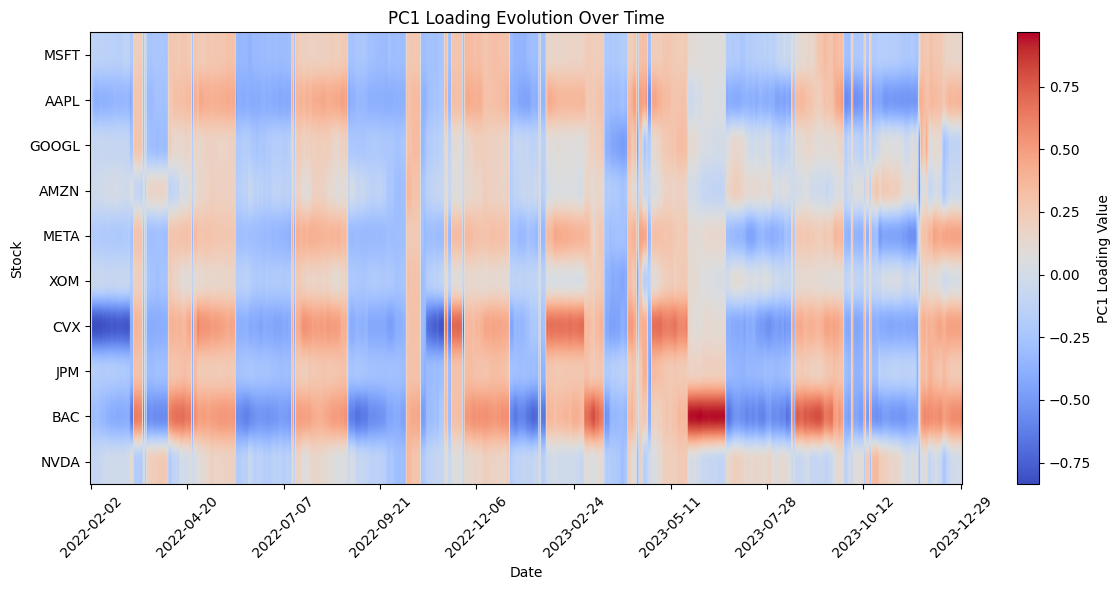

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select 10 tickers
tickers = ['MSFT', 'AAPL', 'GOOGL', 'AMZN', 'META', 'XOM', 'CVX', 'JPM', 'BAC', 'NVDA']

# Download full OHLCV data and select 'Close' only
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')
close_prices = data['Close'].dropna()

# Compute daily log returns from closing prices
returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Rolling PCA configuration
window_size = 21
explained_var_pc1, explained_var_pc2 = [], []
pc1_loadings, dates = [], []

# Perform rolling PCA
for start in range(0, len(returns) - window_size + 1):
    end = start + window_size
    window = returns.iloc[start:end]
    pca = PCA(n_components=2).fit(window)

    explained_var_pc1.append(pca.explained_variance_ratio_[0])
    explained_var_pc2.append(pca.explained_variance_ratio_[1])
    pc1_loadings.append(pca.components_[0])
    dates.append(returns.index[end - 1])

# Create DataFrame of explained variance
var_df = pd.DataFrame({
    'Date': dates,
    'PC1_Variance': explained_var_pc1,
    'PC2_Variance': explained_var_pc2
}).set_index('Date')

# Create DataFrame of PC1 loadings
loadings_df = pd.DataFrame(pc1_loadings, columns=tickers, index=dates)

# Plot 1: PC1 and PC2 variance over time
plt.figure(figsize=(12, 5))
plt.plot(var_df.index, var_df['PC1_Variance'], label='PC1')
plt.plot(var_df.index, var_df['PC2_Variance'], label='PC2')
plt.title('Rolling PCA: Variance Explained by PC1 and PC2')
plt.xlabel('Date')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Heatmap of PC1 loadings

plt.figure(figsize=(12, 6))
plt.imshow(loadings_df.T, aspect='auto', cmap='coolwarm')
plt.colorbar(label='PC1 Loading Value')
plt.yticks(ticks=np.arange(len(tickers)), labels=tickers)
xticks = np.linspace(0, len(loadings_df.index)-1, 10, dtype=int)
plt.xticks(ticks=xticks, labels=loadings_df.index[xticks].strftime('%Y-%m-%d'), rotation=45)
plt.title('PC1 Loading Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.tight_layout()
plt.show()



## Implementation

### 1: Data Perparation
- Collec daily log returns for a large portfolio of diversified stocks
- Use consistent time periods(2018-2024) with minimal missing data

In [34]:
success =  ["XOM","CVX","COP","EOG","SLB","LIN","APD","DD","SHW","ECL",
             "HON","GE","BA","CAT","MMM","AMZN","HD","DIS","MCD","SBUX",
             "PG","KO","PEP","WMT","MO","JNJ","UNH","PFE","MRK","ABT",
             "JPM","BAC","WFC","C","GS","AAPL","MSFT","NVDA","INTC","CSCO",
             "VZ","T","NFLX","CMCSA","DUK","NEE","SO","AEP","EXC",
             "PLD","EQIX","SPG","PSA","O"]


# Function to get and clean individual stock data
def get_clean_price(ticker):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)['Close']
        df = df.ffill().bfill()  # Forward-fill then backward-fill
        return df
    except Exception as e:
        print(f"Failed to load {ticker}: {e}")
        return None

price_dict = {
    ticker: get_clean_price(ticker)
    for ticker in success
}

price_dict = {k: v for k, v in price_dict.items() if v is not None}

combined_prices = pd.concat(price_dict.values(), axis=1, join='inner')
combined_prices.columns = list(price_dict.keys())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [35]:
returns = np.log(combined_prices / combined_prices.shift(1)).dropna()
returns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,XOM,CVX,COP,EOG,SLB,LIN,APD,DD,SHW,ECL,...,DUK,NEE,SO,AEP,EXC,PLD,EQIX,SPG,PSA,O
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.019450,0.007263,0.018270,0.014803,0.025703,0.008352,0.005423,0.015868,0.004004,0.006448,...,-0.003129,-0.021442,-0.005740,-0.008460,-0.013477,-0.001876,0.004599,-0.004650,0.002179,-0.002652
2018-01-04,0.001383,-0.003118,0.011471,0.000180,0.024511,0.015561,0.003839,0.018984,-0.005456,0.008093,...,-0.007865,-0.005151,-0.004274,-0.011909,-0.014181,-0.020238,-0.002297,-0.029687,-0.017859,-0.021841
2018-01-05,-0.000806,-0.001640,-0.001932,0.010936,0.006817,0.008714,0.008345,0.012945,0.020510,0.005189,...,-0.004627,0.004559,0.001712,-0.002116,-0.008344,-0.000799,0.003432,0.009261,-0.005876,-0.000724
2018-01-08,0.004486,0.004913,0.010145,0.004802,0.016173,-0.000372,0.001068,-0.003453,0.005534,-0.003505,...,0.003168,0.008206,0.008938,0.008719,0.010678,0.011601,0.019192,0.006520,0.007942,0.001267
2018-01-09,-0.004255,-0.005383,0.008147,-0.008911,0.001336,0.009686,0.002547,0.002392,0.000495,-0.000293,...,-0.011747,-0.007349,-0.012578,-0.011831,-0.011464,-0.010164,-0.004857,-0.022224,-0.011763,-0.018809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.004053,0.000840,0.013159,0.006781,0.011607,-0.004677,-0.004894,-0.005189,-0.001825,0.003352,...,0.002583,0.011376,0.002170,0.001185,0.008339,0.007905,0.013253,-0.001341,0.004427,0.003970
2024-12-24,0.000940,0.006067,0.007546,0.008144,0.012535,0.008112,0.008379,0.004801,0.004860,0.006878,...,0.003770,0.005777,0.001444,-0.005291,0.005077,0.005363,0.011029,0.011429,0.006604,0.004518
2024-12-26,0.000845,0.000973,-0.002268,-0.003482,0.000000,-0.003411,-0.003180,-0.000129,-0.002919,-0.005749,...,-0.006075,-0.007434,-0.003856,-0.003362,-0.001867,0.020701,-0.001707,0.002593,0.001727,-0.003198


### 2: Run Sliding Window PCA
- Window size: 60 trading days (approximately 3 months)
- Step size: 5 days (weekly overlap)
- For each window we comput the following:
  - Standardized (z-score) returns:
  - Run PCA
  - Record : explained variance ratio for top k PCs, loading vectors, and end date of the window


In [40]:
def get_rolling_windows(data, window=60, step=5, min_valid=0.8):
    """
    Extract rolling windows of raw data.
    Returns a list of windowed DataFrames with metadata.
    """
    results = []
    dates = data.index

    for start in range(0, len(data) - window + 1, step):
        end = start + window
        window_df = data.iloc[start:end].dropna()

        if len(window_df) < window * min_valid:
            continue

        results.append({
            'start_date': dates[start],
            'end_date': dates[end - 1],
            'data': window_df
        })

    return results


from sklearn.decomposition import PCA
def get_rolling_pca_loadings(rolling_windows, n_components=2):
    explained_var_pc1, explained_var_pc2 = [], []
    pc1_loadings, dates = [], []

    for win in rolling_windows:
        pca = PCA(n_components=n_components).fit(win['data'])
        explained_var_pc1.append(pca.explained_variance_ratio_[0])
        explained_var_pc2.append(pca.explained_variance_ratio_[1])
        pc1_loadings.append(pca.components_[0])
        dates.append(win['end_date'])

    # Create final outputs
    loadings_df = pd.DataFrame(pc1_loadings, columns=rolling_windows[0]['data'].columns, index=dates)
    var_df = pd.DataFrame({
        'Date': dates,
        'PC1_Variance': explained_var_pc1,
        'PC2_Variance': explained_var_pc2
    }).set_index('Date')

    return loadings_df, var_df




from sklearn.preprocessing import StandardScaler
def zscore_windows(windows):
    """
    Apply z-score normalization to a list of windowed data frames.
    Returns the same list with 'data' replaced by standardized values.
    """
    z_list = []

    for win in windows:
        z_scores = StandardScaler().fit_transform(win['data'])
        z_list.append({
            'start_date': win['start_date'],
            'end_date': win['end_date'],
            'data': z_scores
        })

    return z_list


In [38]:

raw_windows = get_rolling_windows(returns, window=60, step=5)
z_windows = zscore_windows(raw_windows)

k = 5
pca_results = []


for z in z_windows:
    # Perform PCA on the windowed, standardized data
    pca = PCA().fit(z['data'])  # z['data'] should already be z-scored
    sdev = pca.singular_values_  # Singular values, like R's `pca$sdev`

    # Compute absorption ratio
    ar = sum(sdev[:k]**2) / sum(sdev**2)

    # Save result
    pca_results.append({
        'Date': z['end_date'],
        'AR': ar
    })

absorp_ratio = pd.DataFrame(pca_results)
absorp_ratio


,Date,AR
0,2018-03-29,0.714690
1,2018-04-06,0.730672
2,2018-04-13,0.738781
3,2018-04-20,0.738737
4,2018-04-27,0.739387
...,...,...
335,2024-11-22,0.547469
336,2024-12-02,0.536193
337,2024-12-09,0.527552
338,2024-12-16,0.528735


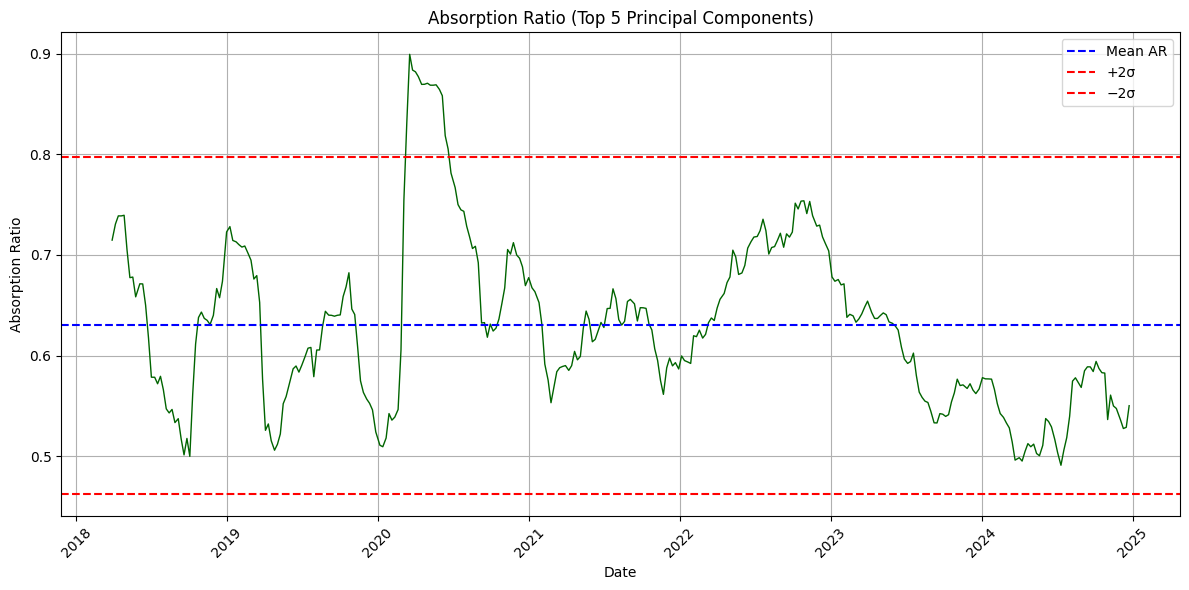

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Basic stats
mean_ar = absorp_ratio['AR'].mean()
std_ar = absorp_ratio['AR'].std()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=absorp_ratio, x='Date', y='AR', color='darkgreen', linewidth=1)

# Horizontal lines
plt.axhline(mean_ar, linestyle='--', color='blue', label='Mean AR')
plt.axhline(mean_ar + 2 * std_ar, linestyle='--', color='red', label='+2σ')
plt.axhline(mean_ar - 2 * std_ar, linestyle='--', color='red', label='−2σ')

# Labels and formatting
plt.title("Absorption Ratio (Top 5 Principal Components)")
plt.xlabel("Date")
plt.ylabel("Absorption Ratio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Regime Change Dates

In [43]:
def identify_regime_change_dates(absorp_ratio: pd.DataFrame, threshold_std: float = 2.0):
    mean_ar = absorp_ratio['AR'].mean()
    std_ar = absorp_ratio['AR'].std()
    absorp_ratio['High Risk Regime'] = absorp_ratio['AR'] > (mean_ar + threshold_std * std_ar)
    absorp_ratio['Low Risk Regime'] = absorp_ratio['AR'] < (mean_ar - threshold_std * std_ar)
    regime_changes = absorp_ratio[absorp_ratio['High Risk Regime'] | absorp_ratio['Low Risk Regime']]
    return len(regime_changes), regime_changes['Date'].tolist(), regime_changes


In [44]:
raw_windows = get_rolling_windows(returns, window=60, step=5)
loadings_df, var_df = get_rolling_pca_loadings(raw_windows)

### Detecting Regime Shifts

In [ ]:
threshold = 0.2

regime_shift_flags = (loadings_df.diff().abs() > threshold)

# Example: See when NVDA has large shifts
nvda_shifts = regime_shift_flags['NVDA']
print("NVDA shifts at:\n", nvda_shifts[nvda_shifts].index)

NVDA shifts at:
 DatetimeIndex(['2018-05-11', '2018-06-25', '2018-07-02', '2018-07-10',
               '2018-12-31', '2019-04-04', '2020-01-06', '2020-01-28',
               '2020-06-12', '2020-11-10', '2022-11-11', '2023-03-03',
               '2023-03-17', '2023-04-10', '2023-06-06', '2023-08-31',
               '2023-11-03', '2024-04-29', '2024-05-06', '2024-05-13',
               '2024-05-20', '2024-06-04', '2024-07-11', '2024-07-18',
               '2024-08-08', '2024-11-08'],
              dtype='datetime64[ns]', freq=None)


[*********************100%***********************]  54 of 54 completed
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


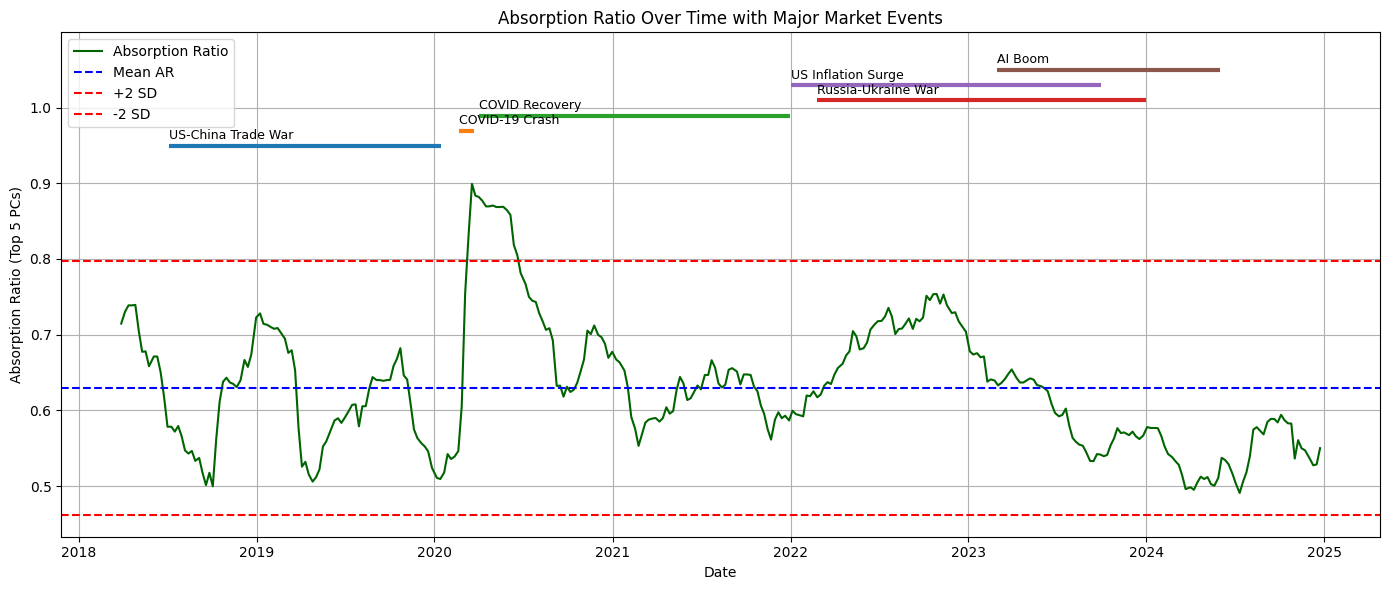

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.colors as mcolors

# 1. Stock tickers
tickers = [
    "XOM", "CVX", "COP", "EOG", "SLB", "LIN", "APD", "DD", "SHW", "ECL",
    "HON", "GE", "BA", "CAT", "MMM", "AMZN", "HD", "DIS", "MCD", "SBUX",
    "PG", "KO", "PEP", "WMT", "MO", "JNJ", "UNH", "PFE", "MRK", "ABT",
    "JPM", "BAC", "WFC", "C", "GS", "AAPL", "MSFT", "NVDA", "INTC", "CSCO",
    "VZ", "T", "NFLX", "CMCSA", "DUK", "NEE", "SO", "AEP", "EXC",
    "PLD", "EQIX", "SPG", "PSA", "O"
]

# 2. Download daily CLOSE prices
start_date = "2018-01-01"
end_date = "2024-12-31"
raw_data = yf.download(tickers, start=start_date, end=end_date)["Close"]
returns = np.log(raw_data / raw_data.shift(1)).dropna()

# 3. Event intervals
event_df = pd.DataFrame([
    {"event": "US-China Trade War", "start": datetime(2018, 7, 6), "end": datetime(2020, 1, 15)},
    {"event": "COVID-19 Crash", "start": datetime(2020, 2, 20), "end": datetime(2020, 3, 23)},
    {"event": "COVID Recovery", "start": datetime(2020, 4, 1), "end": datetime(2021, 12, 31)},
    {"event": "Russia-Ukraine War", "start": datetime(2022, 2, 24), "end": datetime(2023, 12, 31)},
    {"event": "US Inflation Surge", "start": datetime(2022, 1, 1), "end": datetime(2023, 9, 30)},
    {"event": "AI Boom", "start": datetime(2023, 3, 1), "end": datetime(2024, 6, 1)}
])

# 4. Compute Absorption Ratio
def compute_absorption_ratio(data, window=60, step=5, top_k=5):
    results = []
    for start in range(0, len(data) - window + 1, step):
        end = start + window
        window_data = data.iloc[start:end].dropna()
        if len(window_data) < window * 0.8:
            continue
        scaled = StandardScaler().fit_transform(window_data)
        pca = PCA().fit(scaled)
        sdev = pca.singular_values_
        ar = np.sum(sdev[:top_k] ** 2) / np.sum(sdev ** 2)
        results.append({"Date": data.index[end - 1], "AR": ar})
    return pd.DataFrame(results).set_index("Date")

# 5. Calculate absorption ratio
absorp_ratio = compute_absorption_ratio(returns)

# 6. Plot with event bars
plt.figure(figsize=(14, 6))
plt.plot(absorp_ratio.index, absorp_ratio["AR"], label="Absorption Ratio", color="darkgreen")

# Horizontal mean and ±2 SD lines
mean_ar = absorp_ratio["AR"].mean()
std_ar = absorp_ratio["AR"].std()
plt.axhline(mean_ar, color='blue', linestyle='--', label='Mean AR')
plt.axhline(mean_ar + 2*std_ar, color='red', linestyle='--', label='+2 SD')
plt.axhline(mean_ar - 2*std_ar, color='red', linestyle='--', label='-2 SD')

# 7. Horizontal event bars above the plot
colors = list(mcolors.TABLEAU_COLORS.values())
event_y_base = absorp_ratio["AR"].max() + 0.05
event_y_step = 0.02

for i, (_, row) in enumerate(event_df.iterrows()):
    y = event_y_base + i * event_y_step
    color = colors[i % len(colors)]
    plt.hlines(y, row["start"], row["end"], color=color, linewidth=3)
    plt.text(row["start"], y + 0.005, row["event"], fontsize=9, color="black", verticalalignment="bottom")

plt.ylim(None, event_y_base + len(event_df) * event_y_step + 0.03)
plt.title("Absorption Ratio Over Time with Major Market Events")
plt.xlabel("Date")
plt.ylabel("Absorption Ratio (Top 5 PCs)")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Detecting Regimes:
- Rolling PCA: apply PCA to sliding windows if return data
- Monitor AR over time:
  - Sudden jump or drop in absorption ration can signal regime shift
  - Sharp rise in AR coincide with market-wide panic

In [10]:
# 1. Store PC1 loading vectors during each window
pc1_loadings = []
loading_dates = []

for start in range(0, len(returns) - 60 + 1, 5):
    end = start + 60
    window = returns.iloc[start:end]
    if len(window.dropna()) < 0.8 * 60:
        continue
    X_scaled = StandardScaler().fit_transform(window)
    pca = PCA().fit(X_scaled)
    pc1_loadings.append(pca.components_[0])
    loading_dates.append(returns.index[end - 1])

# 2. Convert to DataFrame
loadings_df = pd.DataFrame(pc1_loadings, columns=returns.columns, index=loading_dates)

# Define key events
event_dates = {
    "US-China Trade War": pd.to_datetime("2018-07-06"),
    "COVID-19 Crash": pd.to_datetime("2020-03-16"),
    "COVID Recovery": pd.to_datetime("2020-08-01"),
    "Russia-Ukraine War": pd.to_datetime("2022-02-24"),
    "US Inflation Surge": pd.to_datetime("2022-06-01"),
    "AI Boom": pd.to_datetime("2023-03-01"),
}

# Analyze PC1 composition at each event
for event, date in event_dates.items():
    closest_date = min(loadings_df.index, key=lambda x: abs(x - date))
    pc1_loading = loadings_df.loc[closest_date].sort_values(ascending=False)

    print(f"\n=== {event} ===")
    print(f"Target date: {date.date()}, Closest PCA window ending: {closest_date.date()}")
    print("Top 10 contributors to PC1:")
    print(pc1_loading.head(10).to_string())
    print("Bottom 10 contributors to PC1:")
    print(pc1_loading.tail(10).to_string())



=== US-China Trade War ===
Target date: 2018-07-06, Closest PCA window ending: 2018-07-02
Top 10 contributors to PC1:
Ticker
DD      0.227687
APD     0.225816
ABT     0.214153
CAT     0.210007
BA      0.201923
MSFT    0.199146
LIN     0.196422
GS      0.194342
HON     0.190069
MMM     0.185204
Bottom 10 contributors to PC1:
Ticker
O       0.064406
PEP     0.058011
GE      0.049047
EQIX    0.025224
WMT     0.023279
EXC    -0.035592
NEE    -0.041971
SO     -0.051553
DUK    -0.081606
AEP    -0.087056

=== COVID-19 Crash ===
Target date: 2020-03-16, Closest PCA window ending: 2020-03-18
Top 10 contributors to PC1:
Ticker
EOG    -0.109634
O      -0.116759
SPG    -0.119600
SLB    -0.122101
MMM    -0.122599
WMT    -0.122874
AMZN   -0.123013
CVX    -0.127034
SO     -0.128594
AEP    -0.129027
Bottom 10 contributors to PC1:
Ticker
LIN    -0.145330
AAPL   -0.145392
JPM    -0.145568
C      -0.145710
HD     -0.145873
GS     -0.145994
MSFT   -0.146361
BAC    -0.146525
PEP    -0.146742
WFC    -0.146

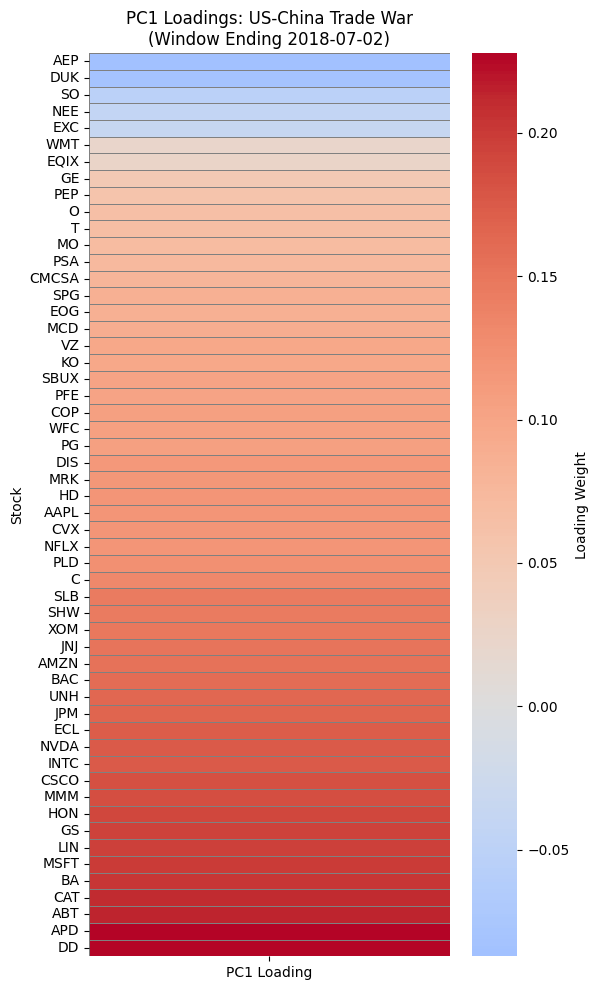

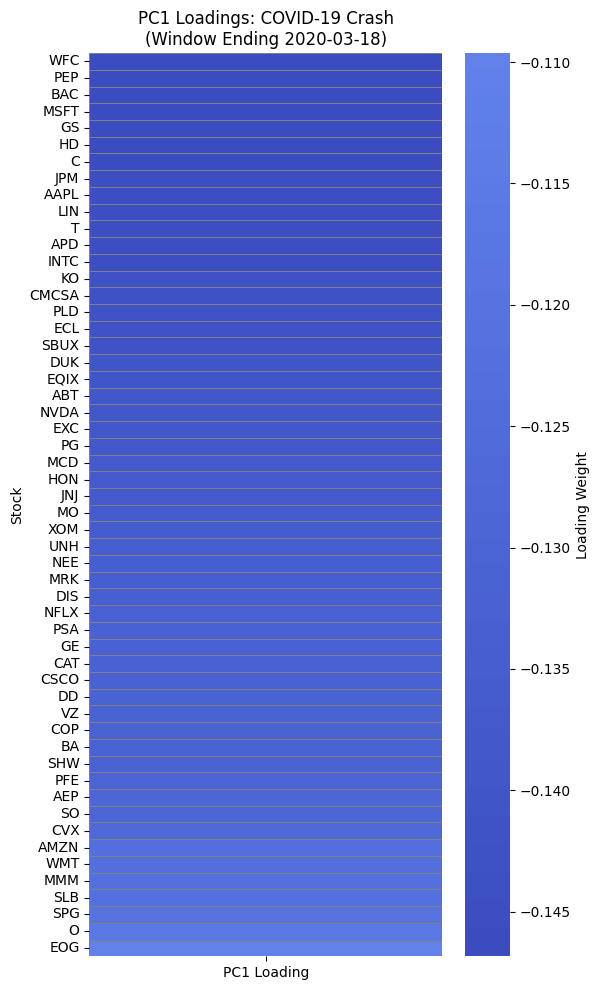

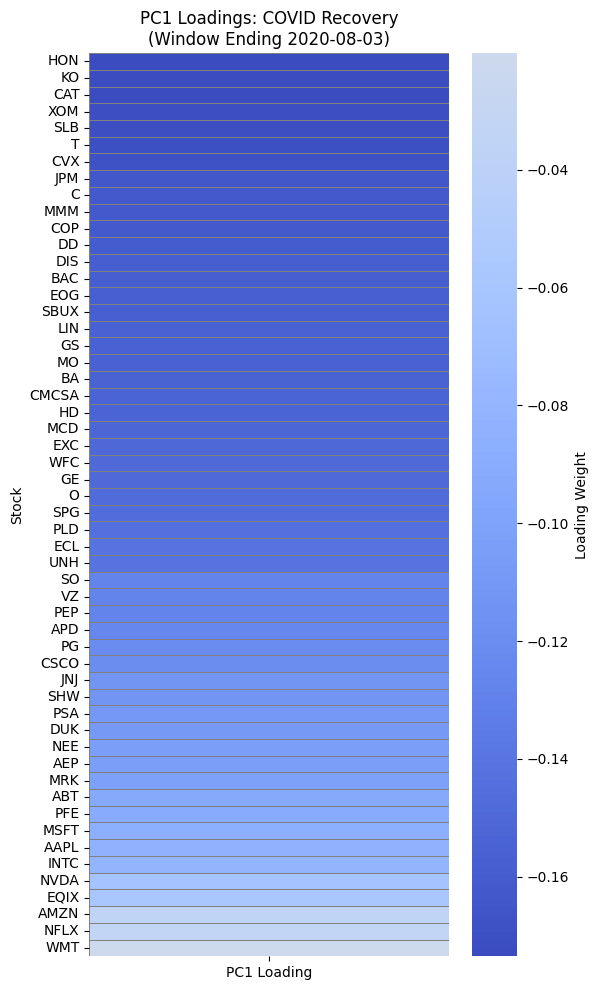

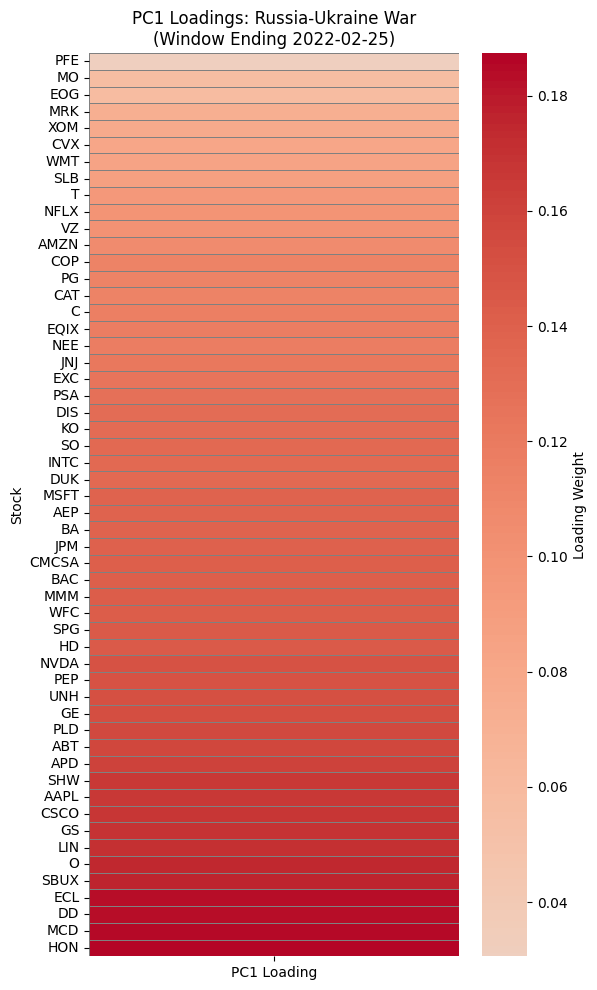

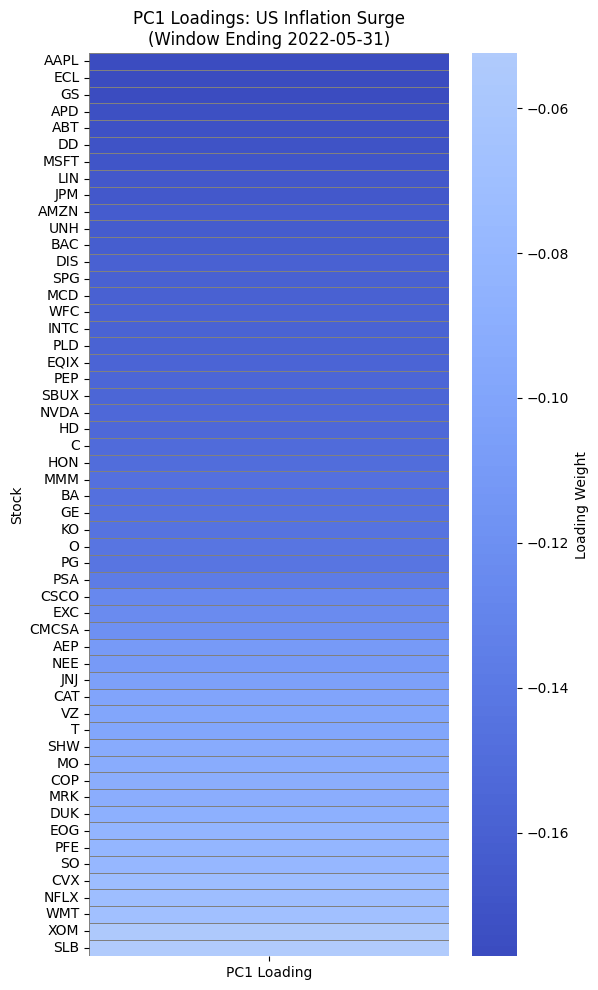

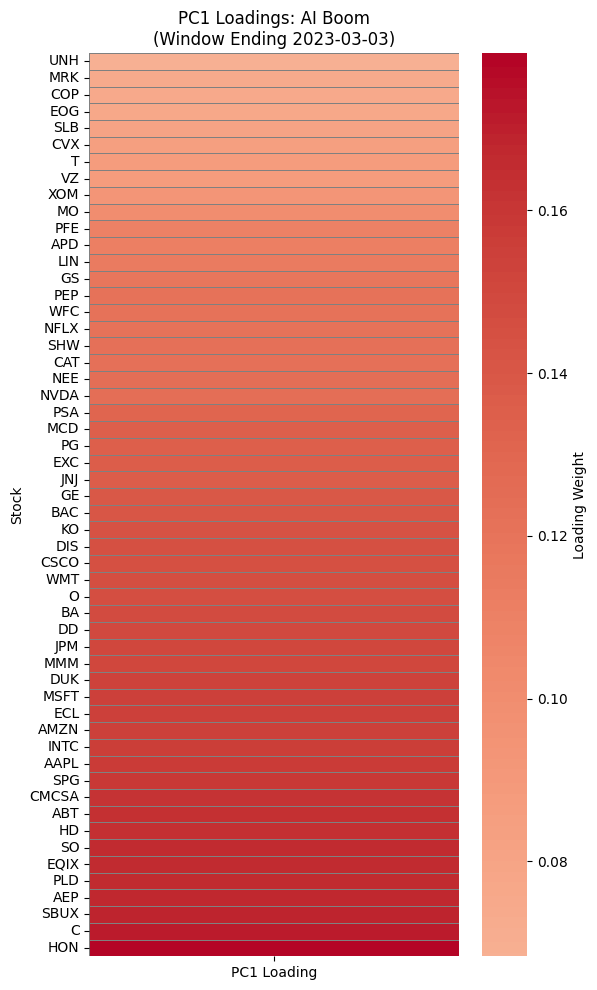

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmaps of PC1 loadings for each event
for event, date in event_dates.items():
    closest_date = min(loadings_df.index, key=lambda x: abs(x - date))
    pc1_loading = loadings_df.loc[closest_date].sort_values(ascending=True)  # sorted for readability

    plt.figure(figsize=(6, 10))
    sns.heatmap(
        pc1_loading.to_frame(name="PC1 Loading"),
        cmap="coolwarm", center=0,
        linewidths=0.5, linecolor='gray',
        cbar_kws={"label": "Loading Weight"}
    )
    plt.title(f"PC1 Loadings: {event}\n(Window Ending {closest_date.date()})")
    plt.xlabel("")
    plt.ylabel("Stock")
    plt.tight_layout()
    plt.show()


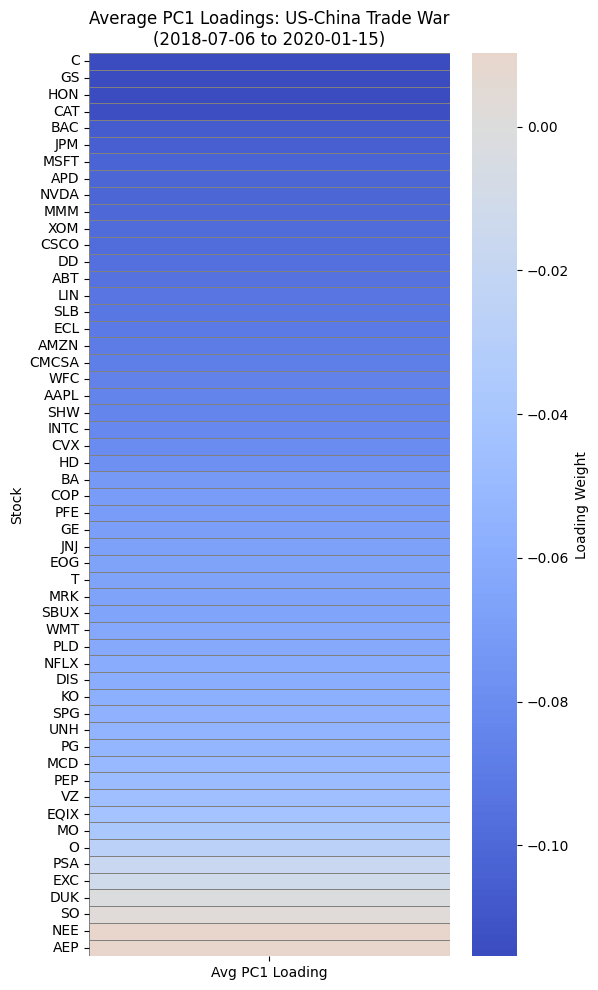

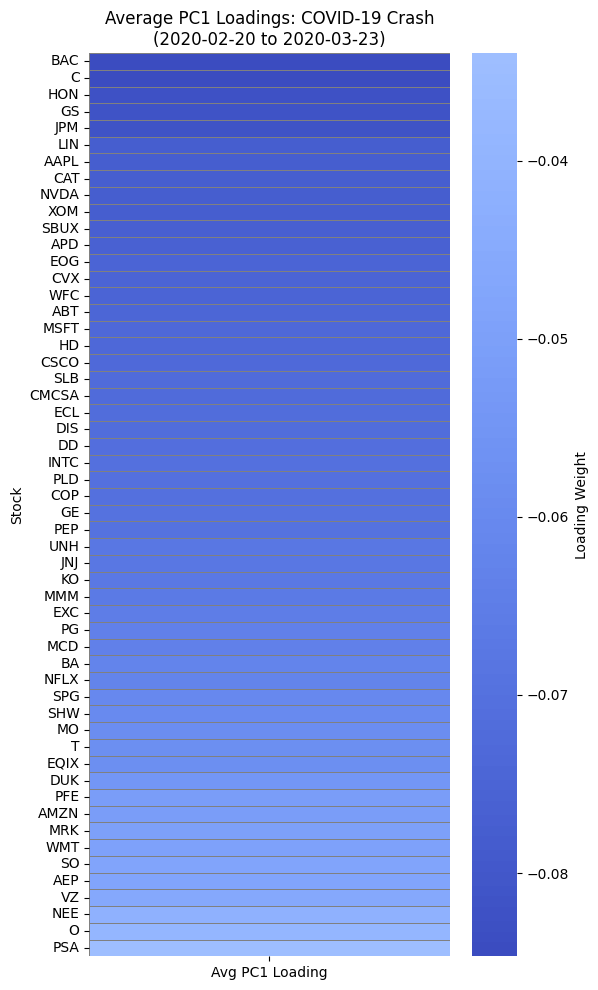

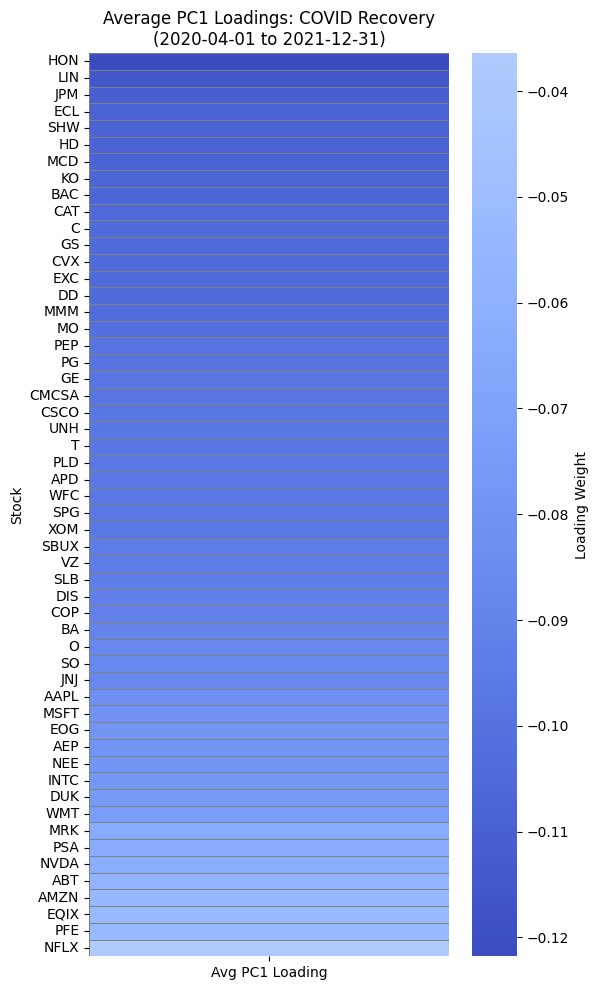

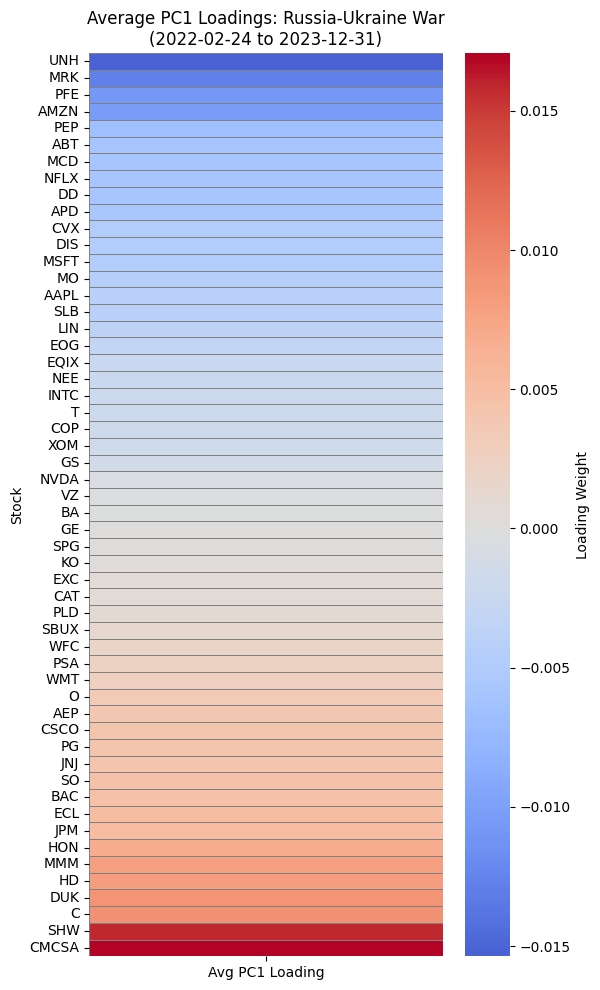

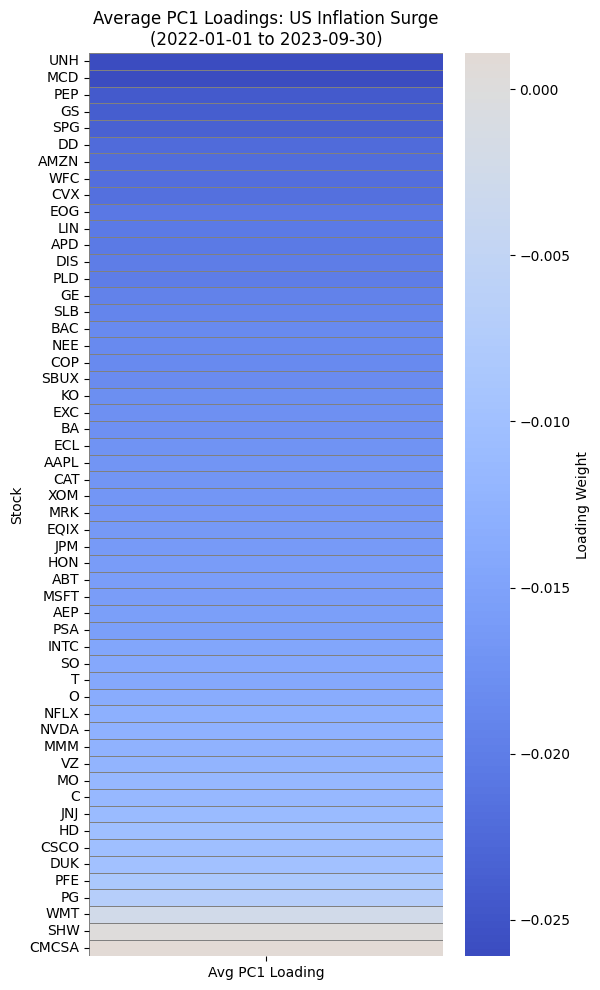

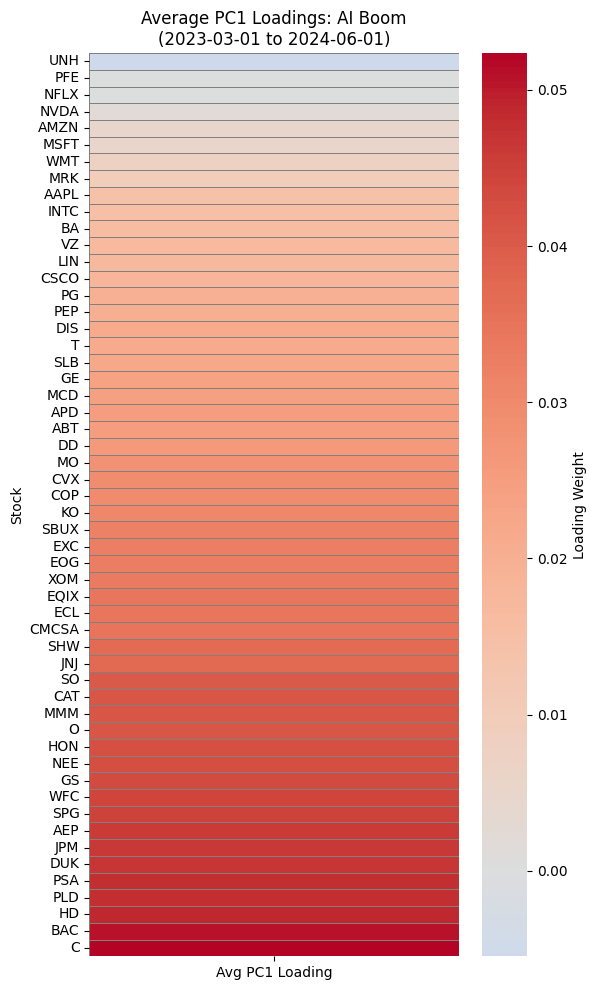

In [11]:
def plot_avg_pc1_loading(event_name, start_date, end_date):
    # Slice the loadings_df by date
    selected = loadings_df.loc[(loadings_df.index >= start_date) & (loadings_df.index <= end_date)]

    # Average across time
    avg_loadings = selected.mean().sort_values(ascending=True)

    # Plot heatmap
    plt.figure(figsize=(6, 10))
    sns.heatmap(
        avg_loadings.to_frame(name="Avg PC1 Loading"),
        cmap="coolwarm", center=0,
        linewidths=0.5, linecolor='gray',
        cbar_kws={"label": "Loading Weight"}
    )
    plt.title(f"Average PC1 Loadings: {event_name}\n({start_date.date()} to {end_date.date()})")
    plt.xlabel("")
    plt.ylabel("Stock")
    plt.tight_layout()
    plt.show()

# Example for the COVID Crash
for _, row in event_df.iterrows():
    plot_avg_pc1_loading(row["event"], row["start"], row["end"])